## First Model Attempt

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [9]:
#loading dataset
df_clean = pd.read_csv('/Users/a12345/Desktop/DATA PT /ML Project/03_ml/preprocessed_dataset_v2.csv')

In [10]:
#defining variables
X = df_clean.drop(columns=["customer_segment"])
y = df_clean["customer_segment"]

In [11]:
#train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
#random forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [20]:
from sklearn.preprocessing import LabelEncoder

#encoding target feature
label_encoder = LabelEncoder()
df_clean["customer_segment"] = label_encoder.fit_transform(df_clean["customer_segment"])

In [22]:
#predictions
y_pred = rf_model.predict(X_test)

#evaluate
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

#printing eval
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_rep)


Model Accuracy: 24.60%
Classification Report:
               precision    recall  f1-score   support

           0       0.24      0.21      0.22       120
           1       0.27      0.29      0.28       126
           2       0.24      0.25      0.24       126
           3       0.24      0.23      0.23       128

    accuracy                           0.25       500
   macro avg       0.25      0.25      0.24       500
weighted avg       0.25      0.25      0.25       500



In [23]:
# Dudum

In [27]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=10, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_rep)

Model Accuracy: 24.60%
Classification Report:
               precision    recall  f1-score   support

           0       0.24      0.21      0.22       120
           1       0.27      0.29      0.28       126
           2       0.24      0.25      0.24       126
           3       0.24      0.23      0.23       128

    accuracy                           0.25       500
   macro avg       0.25      0.25      0.24       500
weighted avg       0.25      0.25      0.25       500



In [ ]:
#Since XG Boost and RF both have this issue, I wanna check the data again for imbalances etc.

## Cleaning

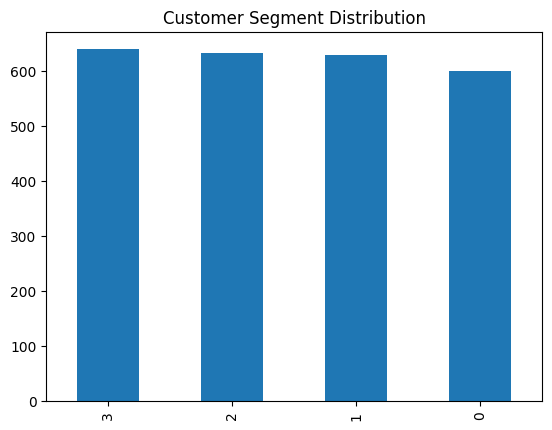

In [28]:
import matplotlib.pyplot as plt

# Check class distribution
df_clean["customer_segment"].value_counts().plot(kind="bar", title="Customer Segment Distribution")
plt.show()


In [ ]:
#customer segment imbalance is not the issue, probably its about hyperparameter tuning